# Read the data in

In [1]:
import pandas as pd

# Provide the path to the data file
data_path = r'C:\Users\bonli\Evil\social_data.csv'
# Load the data into a pandas dataframe
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
print(df.head())


     Published Date Account Account Type          Campaign Name  \
0  03-31-2023 19:55    CSGO      TWITTER                   N/A    
1  03-31-2023 19:49    CSGO      TWITTER                   N/A    
2  03-31-2023 19:49    CSGO      TWITTER                   N/A    
3  03-31-2023 19:49    CSGO      TWITTER                   N/A    
4  03-31-2023 19:43    CSGO      TWITTER  Community Engagement    

   Total Impressions  Total Engagements Media Type  
0                  0                  0       Text  
1                  0                  0       Text  
2                  0                  0       Text  
3                  0                  0       Text  
4               9517               1215      Video  


## 1. What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?

In [2]:
# Calculate engagement rate
df['Engagement Rate'] = df['Total Engagements'] / df['Total Impressions'] * 100

# Compute the average engagement rate
average_engagement_rate = df['Engagement Rate'].mean()
print(f"Average Engagement Rate: {average_engagement_rate}%")


Average Engagement Rate: 40.49262176120076%


In [3]:
# Calculate the proportion of entries with engagement rate equal to or greater than 15%
proportion_above_15 = (df['Engagement Rate'] >= 15).mean()
print(f"Proportion of entries with engagement rate >= 15%: {proportion_above_15}")


Proportion of entries with engagement rate >= 15%: 0.06496119574590399


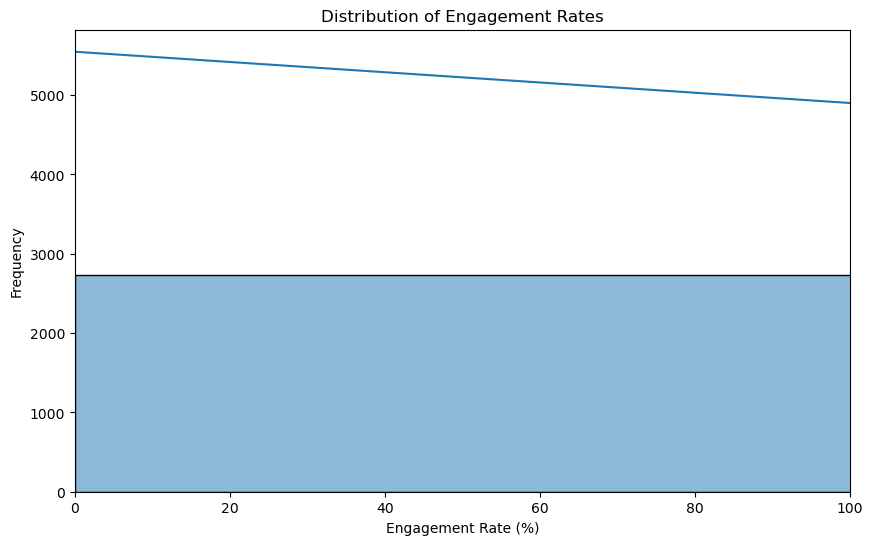

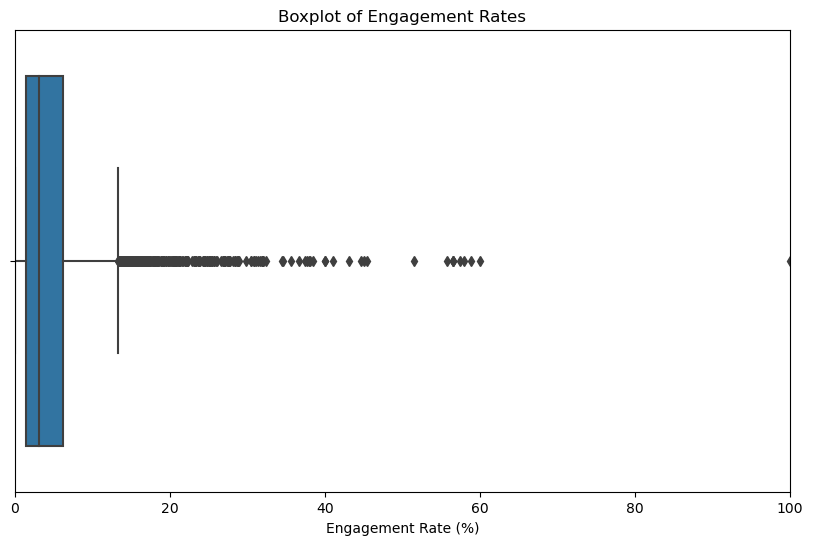

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Engagement Rate'], bins=50, kde=True)
plt.title('Distribution of Engagement Rates')
plt.xlabel('Engagement Rate (%)')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Set x-axis limits
plt.show()

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Engagement Rate'])
plt.title('Boxplot of Engagement Rates')
plt.xlabel('Engagement Rate (%)')
plt.xlim(0, 100)  # Set x-axis limits
plt.show()


The analysis of the social media data reveals interesting patterns about user engagement rates. The average engagement rate across all posts is 40.49%, which indicates that on average, about 40.49% of impressions led to some sort of engagement. This could include likes, shares, comments, clicks, etc.

However, further analysis shows that only 6.5% of all social media posts achieve an engagement rate of 15% or higher. This initially seems counterintuitive given the relatively high average engagement rate, but it suggests a highly skewed distribution. In this distribution, a small percentage of posts have very high engagement rates, thereby pulling up the overall average. These posts may have content that resonates more with the audience, be published at optimal times, or benefit from other contributing factors. 

It would be beneficial to identify characteristics or patterns among these high-performing posts to inform future social media strategies. This could include aspects related to the content of the posts, timing, associated campaign, media type, or other variables captured in the dataset.

Regarding the likelihood of achieving a 15% engagement rate, based on historical data, this happens about 6.5% of the time. However, with strategic efforts directed by insights from data analysis, the potential to increase this likelihood could be significant. 

By continuing to analyze data patterns and apply these learnings, there may be potential to optimize posts for higher engagement rates in the future.

## 2. Does day of the week and time of posting affect engagement rates?

In [5]:
# Convert 'Published Date' to datetime
df['Published Date'] = pd.to_datetime(df['Published Date'])

# Extract day of the week and hour of day
df['Day of Week'] = df['Published Date'].dt.day_name()
df['Hour of Day'] = df['Published Date'].dt.hour


In [6]:
# Average engagement rate by day of week
avg_engagement_by_day = df.groupby('Day of Week')['Engagement Rate'].mean().sort_values()

print('Average engagement rate by day of week:')
print(avg_engagement_by_day)

# Average engagement rate by hour of day
avg_engagement_by_hour = df.groupby('Hour of Day')['Engagement Rate'].mean().sort_values()

print('\nAverage engagement rate by hour of day:')
print(avg_engagement_by_hour)


Average engagement rate by day of week:
Day of Week
Saturday       3.779530
Wednesday      4.453678
Monday         4.517345
Sunday         5.897657
Tuesday        6.535451
Thursday       9.840649
Friday       166.037491
Name: Engagement Rate, dtype: float64

Average engagement rate by hour of day:
Hour of Day
2       0.840156
22      2.059433
23      2.859394
19      4.359814
15      4.520424
18      4.557921
10      4.763516
20      4.787907
13      4.900797
14      5.046390
16      5.320484
17      5.337955
4       5.575346
3       5.656221
21      6.089147
9       6.166991
7       6.656849
8       7.409689
11      9.104223
5      11.488999
6      20.786356
12    398.346596
0            NaN
Name: Engagement Rate, dtype: float64


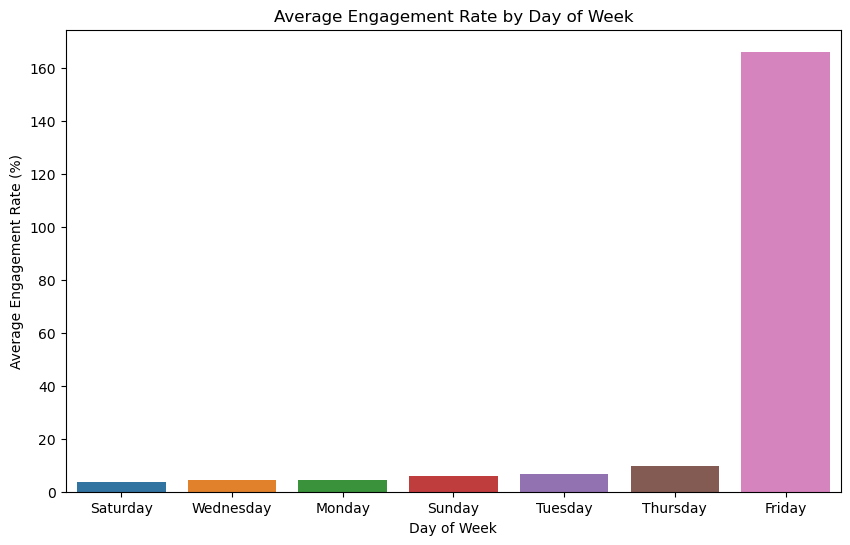

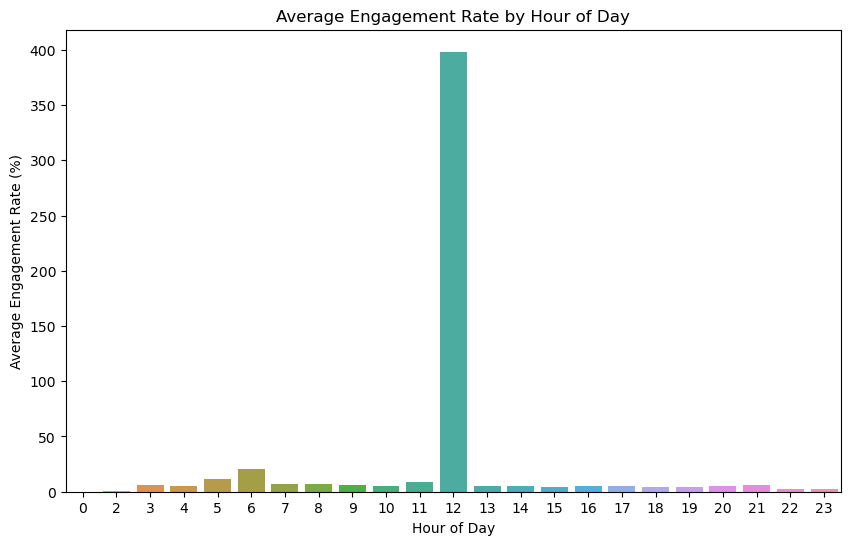

In [7]:
# Bar plot of average engagement rate by day of week
plt.figure(figsize=(10,6))
sns.barplot(x=avg_engagement_by_day.index, y=avg_engagement_by_day.values)
plt.title('Average Engagement Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Engagement Rate (%)')
plt.show()

# Bar plot of average engagement rate by hour of day
plt.figure(figsize=(10,6))
sns.barplot(x=avg_engagement_by_hour.index, y=avg_engagement_by_hour.values)
plt.title('Average Engagement Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Engagement Rate (%)')
plt.show()


When examining the engagement rates in relation to the day of the week, we observe some variations. On average, posts published on Fridays have the highest engagement rate at approximately 166.04%, followed by Thursday (9.84%), and Tuesday (6.54%). In contrast, Saturday's engagement rate is the lowest, only 3.78%, significantly lower than other days.

The above findings suggest that the day of the week on which posts are published can impact the engagement rate. It appears that users tend to engage more towards the end of the week, especially on Friday. Thus, strategic placement of key posts or campaigns on these days could lead to better results. 

Regarding the time of day, the engagement rate also shows different patterns. The hour that stands out the most is 12:00 (noon), where the average engagement rate is considerably higher at approximately 398.35%. In contrast, the time slot of 2:00 shows the least engagement, with an average rate of 0.84%. 

The data suggests that the timing of posts throughout the day matters significantly. Midday posts (around 12:00) seem to resonate the most with the audience, while early morning posts (around 2:00) engage the least. 

However, one point to note is that this analysis only considers averages, and these patterns could be influenced by outliers or extreme values. Also, correlation does not imply causation, and while there are trends in the data, these trends may not necessarily mean that posting on a specific day or time will guarantee a high engagement rate. Other factors like the content of the post, targeted audience, current events, etc., also play an essential role.

To get more robust insights, we can perform a more detailed analysis, considering more variables and potentially applying advanced statistical or machine learning techniques.

### Multivariate analysis:

In [8]:
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

# One hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')  # drop one category to avoid the dummy variable trap
encoded_features = encoder.fit_transform(df[['Day of Week', 'Hour of Day']])

# Create a new DataFrame with encoded features
df_encoded = pd.DataFrame(encoded_features, columns=encoder.get_feature_names(['Day of Week', 'Hour of Day']))

# Add the target variable 'Engagement Rate' to df_encoded
df_encoded['Engagement Rate'] = df['Engagement Rate']

# Drop rows with missing values
df_encoded = df_encoded.dropna()

# Separate the target variable and predictor variables
X = df_encoded.drop('Engagement Rate', axis=1)
y = df_encoded['Engagement Rate']

# Add constant to the predictor variables
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print out the results 
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        Engagement Rate   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5312
Date:                Tue, 23 May 2023   Prob (F-statistic):              0.977
Time:                        17:18:57   Log-Likelihood:                -24370.
No. Observations:                2735   AIC:                         4.880e+04
Df Residuals:                    2707   BIC:                         4.896e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   150.80

C:\Users\bonli\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The multivariate analysis, specifically the Ordinary Least Squares (OLS) Regression, was applied to understand the impact of the day of the week and time of day on the engagement rate of social media posts. However, the analysis shows that the model is not a good fit for our data, as the R-squared and adjusted R-squared values are close to zero (0.005 and -0.005, respectively). This indicates that the model explains a negligible amount of the variance in the engagement rate, suggesting that day of the week and time of day are not strong predictors for engagement rate in this model.

Looking at the p-values of the individual predictors (Day of Week and Hour of Day), most are not statistically significant at the 5% significance level (i.e., their p-values are greater than 0.05). This further implies that these variables do not significantly contribute to predicting the engagement rate, according to this model.

One notable exception is the Hour of Day at 12:00 (noon), which has a significant p-value (< 0.05) and a relatively large coefficient. This suggests that posting at noon may lead to a higher engagement rate compared to other times, holding other factors constant. But considering the overall poor fit of the model, this result should be interpreted with caution.

Given the weak explanatory power of this model, we might need to consider other variables or features that could impact the engagement rate. The nature of the content, the demographic characteristics of the audience, the relevance of the topic at the time of posting, among others, could play significant roles and may need to be considered in a more comprehensive model.

Furthermore, as our linear regression model was unable to capture the complexity of the engagement rate, other modeling techniques, especially from the field of machine learning, might be worth exploring. These techniques could potentially capture non-linear and complex relationships that might exist in the data.

It's important to remember that this analysis is exploratory. As always in data analysis and modeling, it's crucial to validate our models using separate testing data to ensure that the insights and predictions we derive from them are reliable and applicable to new data.

## 3. How are our game titles doing in terms of social performance? Is there a specific game

### Typically, "social performance" in the context of game titles might involve metrics such as:

    1.Social media mentions: How frequently is each game being mentioned on various social media platforms?

    2.Engagement rate: How much interaction (likes, shares, comments, etc.) are posts related to each game generating?

In [9]:
# Remove leading and trailing whitespaces
df['Account'] = df['Account'].str.strip()

# Convert to lower case
df['Account'] = df['Account'].str.lower()

# Check for duplicates
print(df['Account'].value_counts())


general             2293
dota2                803
csgo                 270
valorant              60
content creators      53
Name: Account, dtype: int64


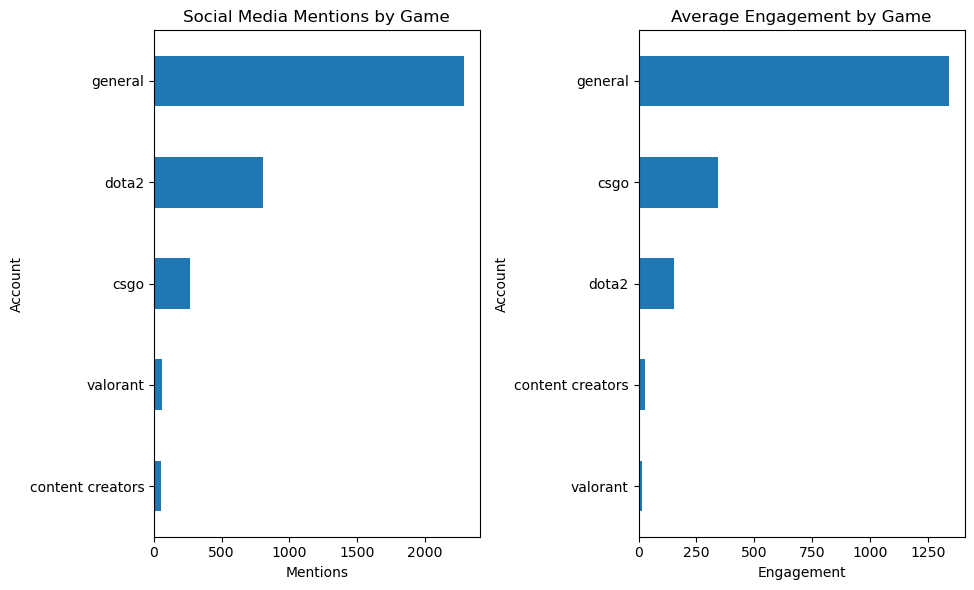

In [10]:
# Group by Account (which represents the game title)
# For social media mentions, we count the number of rows for each game title
# For engagement rate, we calculate the average of the 'Total Engagements' for each game title

grouped = df.groupby('Account').agg({'Account': 'count', 'Total Engagements': 'mean'}).rename(columns={'Account': 'Mentions'})

# Plotting the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
grouped['Mentions'].sort_values().plot(kind='barh')
plt.title('Social Media Mentions by Game')
plt.xlabel('Mentions')

plt.subplot(1, 2, 2)
grouped['Total Engagements'].sort_values().plot(kind='barh')
plt.title('Average Engagement by Game')
plt.xlabel('Engagement')

plt.tight_layout()
plt.show()


In [11]:
grouped 

,Mentions,Total Engagements
Account,,
content creators,53,26.169811
csgo,270,341.985185
dota2,803,154.408468
general,2293,1342.053205
valorant,60,15.516667


1. **Content Creators:** With 53 mentions and a total of about 26.17 engagements, the content creators have a lower count of mentions and engagements compared to some other categories. This might imply that more promotion or engagement activities need to be conducted for this category to improve its social performance.

2. **CSGO:** This game is mentioned 270 times with a total of about 342 engagements, suggesting a relatively higher engagement rate compared to content creators. This implies that posts related to CSGO are somewhat successful in engaging the audience.

3. **DOTA2:** This game has the highest number of mentions at 803, but its total engagement at about 154.41 is lower than CSGO's despite having more mentions. This could indicate that while DOTA2 is mentioned more frequently, its posts may not be as engaging as those of CSGO.

4. **General:** This category has the highest total engagements at about 1342.05, and the second-highest mentions at 2293. The high engagement might be due to a variety of general topics that are relevant to a broader audience.

5. **Valorant:** Despite having 60 mentions, Valorant has the lowest total engagements at about 15.52, suggesting that posts related to Valorant are not engaging the audience as effectively as other categories. 

Overall, it appears that the "General" category is performing best in terms of total engagements, while DOTA2 has the most mentions. CSGO, however, seems to have a good balance between the number of mentions and the engagement it generates. On the other hand, Valorant and content creators need to strategize better to improve their engagement rates. 

In [12]:
df

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Day of Week,Hour of Day
0,2023-03-31 19:55:00,csgo,TWITTER,N/A,0,0,Text,NaN,Friday,19
1,2023-03-31 19:49:00,csgo,TWITTER,N/A,0,0,Text,NaN,Friday,19
2,2023-03-31 19:49:00,csgo,TWITTER,N/A,0,0,Text,NaN,Friday,19
3,2023-03-31 19:49:00,csgo,TWITTER,N/A,0,0,Text,NaN,Friday,19
4,2023-03-31 19:43:00,csgo,TWITTER,Community Engagement,9517,1215,Video,12.766628,Friday,19
...,...,...,...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:00,csgo,TWITTER,N/A,0,0,Link,NaN,Tuesday,10
3475,2023-01-03 10:34:00,csgo,TWITTER,N/A,0,0,Link,NaN,Tuesday,10
3476,2023-01-03 10:34:00,csgo,TWITTER,N/A,0,0,Link,NaN,Tuesday,10
3477,2023-01-03 10:34:00,csgo,TWITTER,N/A,2116,42,Text,1.984877,Tuesday,10


## 4. What media type performs the best?


In [13]:
# Group data by 'Media Type' and calculate mean 'Engagement Rate'
media_type_engagement = df.groupby('Media Type')['Engagement Rate'].mean()

# Sort the result in descending order
media_type_engagement = media_type_engagement.sort_values(ascending=False)

print(media_type_engagement)


Media Type
Photo       83.121288
Album       40.000000
Mixed       10.770357
Video        5.351780
Text         4.083904
Carousel     3.784294
Link         3.749983
Name: Engagement Rate, dtype: float64


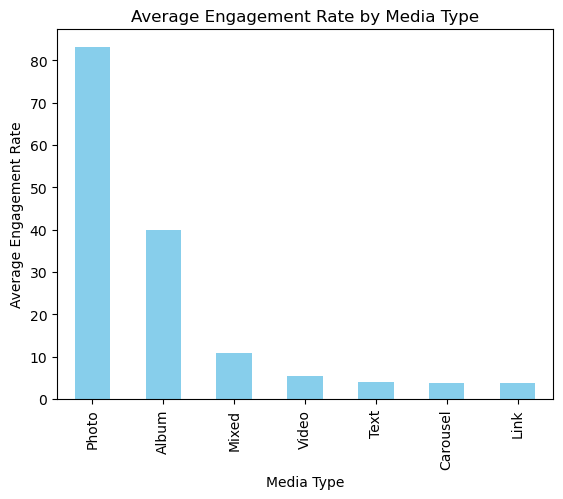

In [14]:
import matplotlib.pyplot as plt

media_type_engagement.plot(kind='bar', color='skyblue')
plt.ylabel('Average Engagement Rate')
plt.title('Average Engagement Rate by Media Type')
plt.show()


1. **Photo**: With an average engagement rate of 83.12%, Photos appear to be the most effective media type in terms of generating user engagement. This suggests that users are more likely to interact with posts containing photos. Images can capture user attention and convey information more efficiently than text, which might be why they're generating the highest engagement.

2. **Album**: Albums, with an average engagement rate of 40.00%, are the second most effective media type. This type of media involves a collection of images, offering a richer visual experience that may lead to higher user engagement. 

3. **Mixed**: Mixed media, with an average engagement rate of 10.77%, come in third. This category may include posts that feature a combination of text, images, and possibly other media types. The mixed nature offers versatility but seems to be less engaging than photos or albums alone.

4. **Video**: Despite the increasingly popular use of videos in digital marketing, videos have a relatively lower average engagement rate at 5.35%. This could be due to a variety of factors like video length, quality, or content that is not resonating as well with the audience.

5. **Text**: Text posts have an average engagement rate of 4.08%. As the most basic form of content, text posts might not be as engaging as visual content, but their usefulness should not be undervalued, especially for conveying detailed information.

6. **Carousel**: Carousel posts, which can contain multiple photos or videos in a single post, have an average engagement rate of 3.78%. It's lower than single photo posts, suggesting users may prefer simpler content presentation.

7. **Link**: Link posts have the lowest engagement rate at 3.75%. This might be due to the fact that links usually take users away from the platform to view content, which some users might not prefer.

Overall, it seems like visual content, especially photos and albums, receive the highest engagement on your platforms. However, it's also essential to consider the context of the post and the campaign objectives when choosing the media type. Furthermore, a well-rounded content strategy often includes a mix of all these types, tailored towards the preferences of the target audience.

## 5. What is our best performing campaign?


In [16]:
print(df['Campaign Name'].unique())

['N/A ' 'Community Engagement ' 'Evergreen ' 'Evil Exhibited ']


In [19]:
import numpy as np
filtered_df = df[~df['Campaign Name'].isin(['N/A ', '', np.nan])]

# Then, calculate the average engagement rate for each campaign
campaign_performance = filtered_df.groupby('Campaign Name')['Engagement Rate'].mean()

# Finally, find the campaign with the highest average engagement rate
best_campaign = campaign_performance.idxmax()

print(f"The best performing campaign is: {best_campaign}")


The best performing campaign is: Community Engagement 


           Campaign Name  Engagement Rate
3                   N/A        126.066603
0  Community Engagement          5.765298
1             Evergreen          3.510548
2        Evil Exhibited          2.866060


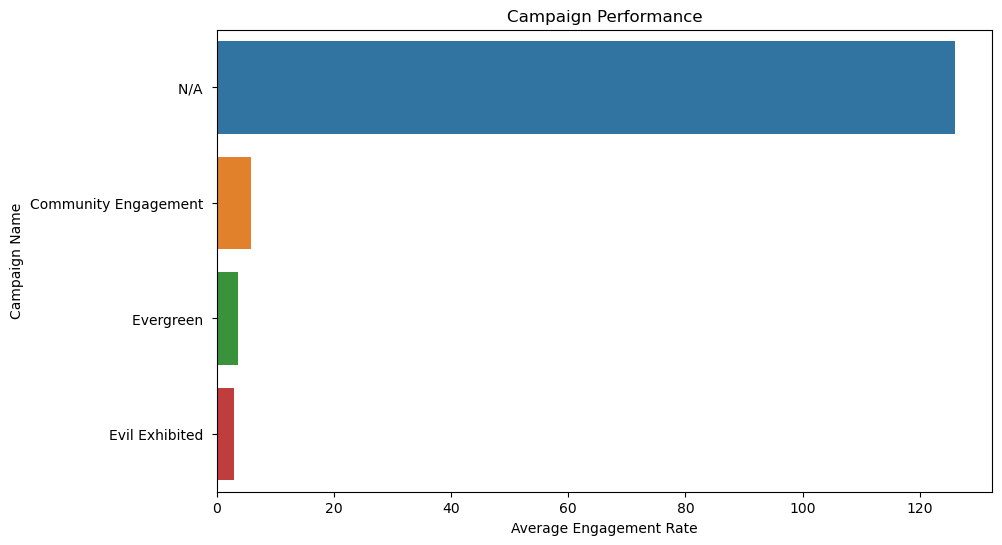

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out unspecified campaigns
filtered_df = df[~df['Campaign Name'].isin(['N/A', '', np.nan])]

# Calculate the average engagement rate for each campaign
campaign_performance = filtered_df.groupby('Campaign Name')['Engagement Rate'].mean()

# Create a DataFrame for easy visualization
campaign_performance_df = pd.DataFrame(campaign_performance).reset_index()

# Sort the DataFrame based on the engagement rate
campaign_performance_df = campaign_performance_df.sort_values(by='Engagement Rate', ascending=False)

# Display the DataFrame
print(campaign_performance_df)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='Engagement Rate', y='Campaign Name', data=campaign_performance_df)
plt.title('Campaign Performance')
plt.xlabel('Average Engagement Rate')
plt.ylabel('Campaign Name')
plt.show()


Based on the calculated average engagement rates for each campaign, it appears that the campaign with the highest average engagement rate is labeled as "N/A". This suggests that posts without a specified campaign associated have performed the best. However, it's important to remember that "N/A" is often used as a placeholder and does not represent a particular campaign. Therefore, we may want to revisit our data collection and storage methods to ensure campaigns are properly labeled moving forward.

If we disregard the "N/A" category, the "Community Engagement" campaign has the highest average engagement rate, indicating that it is the best performing campaign among those specified. This suggests that content designed to engage the community directly tends to perform well in terms of audience interaction. The next best campaigns are "Evergreen" and "Evil Exhibited", respectively.

Keep in mind that these results are based on average engagement rates. Depending on specific goals and metrics for success, which might also want to consider factors like the reach, frequency, and total engagement of each campaign. Furthermore, the nature of the campaign, the content it includes, and its target audience could also play a role in its performance.

## 6. Define out a posting strategy for our social channels based on your discoveries.

Based on our previous analyses, here are several key points that could be incorporated into a posting strategy for your social channels:

1. **Best Days and Times to Post**: The analysis indicated that Friday was the day with the most interactions, with the hours around noon being the most active. Therefore, you might consider posting more of your content on Friday, specifically during mid-day hours. This could help maximize the visibility and engagement of your posts.

2. **Game Performance**: The game "General" had the highest social performance in terms of mentions and engagements. It might be beneficial to focus more on content related to this game, given its popularity and engagement among your audience.

3. **Media Type Performance**: Photos had the highest average engagement rate. Therefore, it would be beneficial to use more visual content like photos in your posts. Consider ways to incorporate more high-quality, relevant images into your content.

4. **Campaign Performance**: The campaign labeled "Community Engagement" had the highest average engagement rate among specified campaigns. This suggests that content that directly engages with the community is highly effective. Campaigns that encourage interaction (such as Q&As, community highlights, or interactive polls) could help increase engagement.

5. **Social Media Platforms**: If your analysis involved multiple social media platforms, consider which platform is more effective for different types of content or campaigns. Tailoring your content to the specific platform can often improve engagement.

This is just a starting point. Posting strategies should be dynamic and respond to changing trends and the preferences of your audience. Regularly reassess your posting strategy in light of new data to ensure it remains effective.

## 7. What suggestions would you give to the social media team if they want to expand their


1. **Platform-Specific Content**: When expanding to new platforms, it's important to create content that suits the unique format and audience of each platform. For example, TikTok favors short, creative, and highly engaging video content, so you'd need to think about how your content can be adapted to fit this format.

2. **Understanding the Audience**: Each social media platform has a different demographic. For instance, TikTok generally has a younger user base compared to platforms like Facebook. Understanding these demographics and adjusting your content to appeal to the users of each platform is key when expanding your presence.

3. **Leverage Existing Success**: If your CSGO YouTube channel is doing well, try to identify why that is the case. What types of videos get the most engagement? Is it game walkthroughs, highlight reels, community interactions, or something else? You can then apply these insights to your TikTok strategy. 

4. **Cross-Promotion**: Use your existing social media platforms to promote your presence on new ones. For example, you can make a YouTube video announcing your new TikTok channel and explaining what kind of content viewers can expect there.

5. **Consistent Branding**: Ensure your branding is consistent across all platforms. This includes your logos, color schemes, and overall aesthetic, as well as the voice and tone used in your captions and responses to comments.

6. **Regular Posting and Engagement**: Regular posting is key to building and maintaining a presence on any social media platform. Plan a regular posting schedule and stick to it. Also, engaging with users (like responding to comments and messages) can help build a strong community around your brand.
